<a href="https://colab.research.google.com/github/dataqueenpend/Case-Studies/blob/main/Case_Study_School_Budgeting_with_Machine_Learning_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Case Study: School Budgeting with Machine Learning in Python

 You'll explore a problem related to school district budgeting. By building a model to automatically classify items in a school's budget, it makes it easier and faster for schools to compare their spending with other schools.

 *You'll begin by building a baseline model that is a simple, first-pass approach. In particular, you'll do some natural language processing to prepare the budgets for modeling. 
 
 * Next, you'll have the opportunity to try your own techniques and see how they compare to participants from the competition. 
 
 * Finally, you'll see how the winner was able to combine a number of expert techniques to build the most accurate model.

 Case study with DataCamp. Performed by myself.

##Exploring the raw data

*How can we accurately classify line-items in a school budget based on what that money is being used for?* 

We will explore the raw text and numeric values in the dataset, both quantitatively and visually. And we'll learn how to measure success when trying to predict class labels for each row of the dataset.


> **bring the power of data science to social impact organizations**

* running online data science challenges for non-profits, NGOs, and social enterprises.

*What we'll be brainstorming on here?*

We'll work through one of these competitions as a case-study, and we'll show you how the winner achieved the best score. 

* do some natural language processing, 
* some feature engineering, 
* and boost computational efficiency. 

*In addition to these pro-tips, we'll look at one of the ways in which we can use data to have a social impact.*

Let's see what's in the challenge!

> School budgets in the United States are incredibly complex, and there are no standards for reporting how money is spent. 

* Schools want to be able to measure their performance
  * for example, are we spending more on textbooks than our neighboring schools, and is that investment worthwhile?

to do this comparison takes **hundreds of hours each year** in which analysts hand-categorize each line-item.

*Our goal is to build a machine learning algorithm that can automate that process.*

* For each line item, we have some text fields that tell us about the expense--
  * for example, a line might say something like "Algebra books for 8th grade students". We also have the amount of the expense in dollars. 

*  This line item then has a set of labels attached to it. 
  * For example, this one might have labels like "Textbooks," "Math," and "Middle School." These labels are our target variable 

> This is a **supervised learning problem** where we want to use correctly labeled data to build an algorithm that can suggest labels for unlabeled lines. 

 This is in contrast to an unsupervised learning problem where we don't have labels, and we are using an algorithm to automatically which line-items might go together.


* we have over 100 unique target variables that could be attached to a single line item.
  * we want to predict a category for each line item, this is a **classification problem**.

This is as opposed to a regression problem where we want to predict a numeric value for a line item--for example, predicting house prices. 


*Here are some of the actual categories that we need to determine:*
* Is this expense for pre-kindergarten education (which is important because it has different funding sources)? 
* Is there a particular Student_Type that this expense supports?




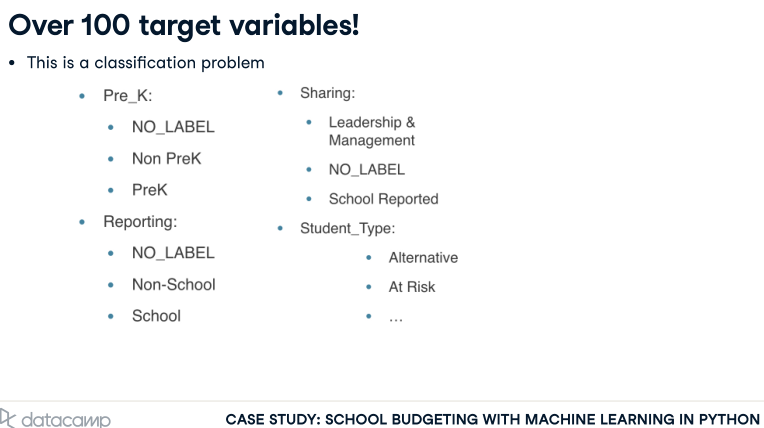



 there are **9 columns** with many different possible categories in each column.

**How we can help?**

> If you talk to the people who actually do this work, it is **impossible for a human to label these line items with 100% accuracy**.

 To take this into account, we don't want our algorithm to just say "This line is for textbooks." **We want the algorithm to say: "It's most likely this line is for textbooks, and I'm 60% sure that it is. If it's not textbooks, I'm 30% sure it's 'office supplies.'"** By making these suggestions, analysts can prioritize their time. This is called a **human-in-the-loop machine learning system**.

 * We will predict a probability between 0 (the algorithm thinks this label is very unlikely for this line item) and 1 (the algorithm thinks this label is very likely).

 ###Exploring the data

 If we are predicting probabilities, **we need a value for each possible value in each column**. 
  * In this case, the target would have the columns for each hair type and for each eye color. 

  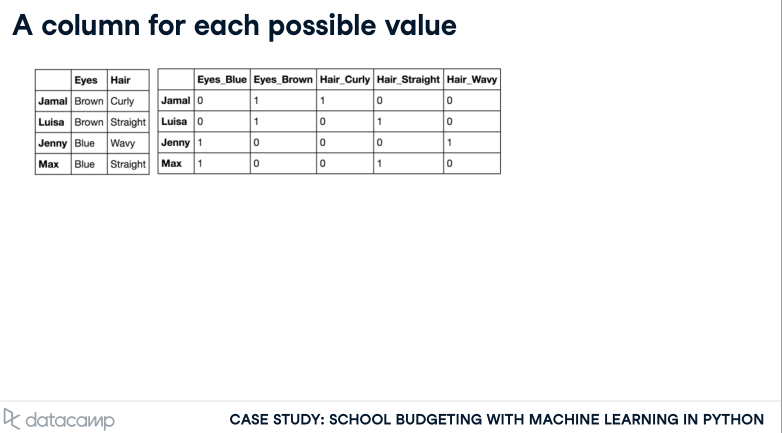

**Loading the data**

We'll use pandas to load the data into a DataFrame and then do some Exploratory Data Analysis (EDA) of it.

(for this case study - DataCamp didn't share the dataset - because of that, we'll unfortunately we'll be doing all the code only in "sample mode")



In [ ]:
df = pd.read_csv('TrainingData.csv', index_col=0)

df.info()
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 198 to 101861
Data columns (total 25 columns):
Function                  1560 non-null object
Use                       1560 non-null object
Sharing                   1560 non-null object
Reporting                 1560 non-null object
Student_Type              1560 non-null object
Position_Type             1560 non-null object
Object_Type               1560 non-null object
Pre_K                     1560 non-null object
Operating_Status          1560 non-null object
Object_Description        1461 non-null object
Text_2                    382 non-null object
SubFund_Description       1183 non-null object
Job_Title_Description     1131 non-null object
Text_3                    296 non-null object
Text_4                    193 non-null object
Sub_Object_Description    364 non-null object
Location_Description      874 non-null object
FTE                       449 non-null float64
Function_Description      1340 non-null object
Facility_or_Department    252 non-null object
Position_Extra            1026 non-null object
Total                     1542 non-null float64
Program_Description       1192 non-null object
Fund_Description          819 non-null object
Text_1                    1132 non-null object
dtypes: float64(2), object(23)
memory usage: 356.9+ KB

In [5]:
df.head()
Out[5]:

                    Function          Use          Sharing   Reporting Student_Type Position_Type               Object_Type     Pre_K   Operating_Status  ... Location_Description  FTE                  Function_Description      Facility_or_Department Position_Extra     Total                                Program_Description                                   Fund_Description                Text_1
198                 NO_LABEL     NO_LABEL         NO_LABEL    NO_LABEL     NO_LABEL      NO_LABEL                  NO_LABEL  NO_LABEL      Non-Operating  ...                  NaN  NaN  Care and Upkeep of Building Services                         NaN            NaN  -8291.86                                                NaN  Title I - Disadvantaged Children/Targeted Assi...    TITLE I CARRYOVER 
209   Student Transportation     NO_LABEL  Shared Services  Non-School     NO_LABEL      NO_LABEL    Other Non-Compensation  NO_LABEL  PreK-12 Operating  ...      ADMIN. SERVICES  NaN             STUDENT TRANSPORT SERVICE                         NaN            NaN    618.29                               PUPIL TRANSPORTATION                                       General Fund                   NaN
750     Teacher Compensation  Instruction  School Reported      School  Unspecified       Teacher  Base Salary/Compensation  Non PreK  PreK-12 Operating  ...                  NaN  1.0                                   NaN                         NaN        TEACHER  49768.82                              Instruction - Regular                             General Purpose School                   NaN
931                 NO_LABEL     NO_LABEL         NO_LABEL    NO_LABEL     NO_LABEL      NO_LABEL                  NO_LABEL  NO_LABEL      Non-Operating  ...                  NaN  NaN                           Instruction  Instruction And Curriculum            NaN     -1.02  "Title I, Part A Schoolwide Activities Related...                             General Operating Fund                   NaN
1524                NO_LABEL     NO_LABEL         NO_LABEL    NO_LABEL     NO_LABEL      NO_LABEL                  NO_LABEL  NO_LABEL      Non-Operating  ...                  NaN  NaN            Other Community Services *                         NaN            NaN   2304.43                                                NaN  Title I - Disadvantaged Children/Targeted Assi...   TITLE I PI+HOMELESS

[5 rows x 25 columns]


In [6]:
df.tail()
Out[6]:

                        Function          Use                  Sharing   Reporting       Student_Type Position_Type                 Object_Type     Pre_K   Operating_Status  ...  Location_Description  FTE                   Function_Description Facility_or_Department               Position_Extra       Total            Program_Description                Fund_Description                         Text_1
344986   Substitute Compensation  Instruction          School Reported      School        Unspecified    Substitute                    Benefits  NO_LABEL  PreK-12 Operating  ...                   NaN  NaN                UNALLOC BUDGETS/SCHOOLS                    NaN   PROFESSIONAL-INSTRUCTIONAL    27.04000  GENERAL HIGH SCHOOL EDUCATION                             NaN            REGULAR INSTRUCTION
384803                  NO_LABEL     NO_LABEL                 NO_LABEL    NO_LABEL           NO_LABEL      NO_LABEL                    NO_LABEL  NO_LABEL      Non-Operating  ...  PERSONNEL-PAID LEAVE  NaN                            NON-PROJECT                    NaN   PROFESSIONAL-INSTRUCTIONAL         NaN                 STAFF SERVICES                             NaN                        CENTRAL
224382   Substitute Compensation  Instruction          School Reported      School  Special Education    Substitute     Substitute Compensation  NO_LABEL  PreK-12 Operating  ...               School   0.0         EXCEPTIONAL                                       NaN                          NaN   200.39000                            NaN  GENERAL FUND                                              NaN
305347  Facilities & Maintenance          O&M  Leadership & Management  Non-School             Gifted     Custodian  Other Compensation/Stipend  Non PreK  PreK-12 Operating  ...           Unallocated  NaN  Facilities Maintenance And Operations    Gifted And Talented  ANY CUS WHO IS NOT A SUPER      5.29000            Gifted And Talented          General Operating Fund  ADDL REGULAR PAY-NOT SMOOTHED
101861      Teacher Compensation  Instruction          School Reported      School            Poverty       Teacher    Base Salary/Compensation  NO_LABEL  PreK-12 Operating  ...                   NaN  NaN                                TITLE I                    NaN   PROFESSIONAL-INSTRUCTIONAL  1575.03504   GENERAL ELEMENTARY EDUCATION                             NaN            REGULAR INSTRUCTION

[5 rows x 25 columns]

Some of the column names correspond to features - descriptions of the budget items - such as the Job_Title_Description column. *The values in this column tell us if a budget item is for a teacher, custodian, or other employee.*

Some columns correspond to the budget **item labels we will be trying to predict with our model**. 
  * For example, the Object_Type column describes whether the budget item is related classroom supplies, salary, travel expenses, etc.


**Summarizing the data**

We'll continue your EDA in this exercise by computing summary statistics for the numeric data in the dataset. 

there are two numeric columns, called FTE and Total.

* ```FTE```: Stands for "full-time equivalent". If the budget item is associated to an employee, this number tells us the percentage of full-time that the employee works. A value of 1 means the associated employee works for the school full-time. A value close to 0 means the item is associated to a part-time or contracted employee.
* ```Total```: Stands for the total cost of the expenditure. This number tells us how much the budget item cost.


In [ ]:
# Print the summary statistics
print(df.describe())

# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create the histogram
plt.hist(df['FTE'].dropna())

# Add title and labels
plt.title('Distribution of %full-time \n employee works')
plt.xlabel('% of full-time')
plt.ylabel('num employees')

# Display the histogram
plt.show()

In [ ]:
<script.py> output:
                  FTE         Total
    count  449.000000  1.542000e+03
    mean     0.493532  1.446867e+04
    std      0.452844  7.916752e+04
    min     -0.002369 -1.044084e+06
    25%      0.004310  1.108111e+02
    50%      0.440000  7.060299e+02
    75%      1.000000  5.347760e+03
    max      1.047222  1.367500e+06

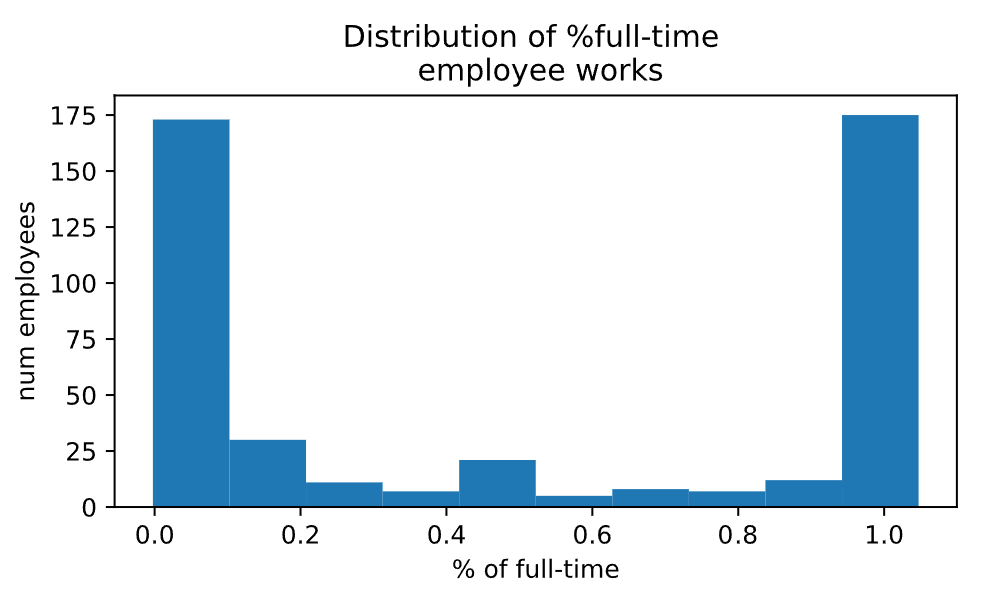

> The high variance in expenditures makes sense (some purchases are cheap some are expensive). Also, it looks like the FTE column is bimodal. That is, there are some part-time and some full-time employees.


###Looking at the datatypes

We've seen we have some numeric values and some text values in our dataset. It's common to have data where each value is from a known set of categories.

In [ ]:
df.info()
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 198 to 101861
Data columns (total 25 columns):
Function                  1560 non-null object
Use                       1560 non-null object
Sharing                   1560 non-null object
Reporting                 1560 non-null object
Student_Type              1560 non-null object
Position_Type             1560 non-null object
Object_Type               1560 non-null object
Pre_K                     1560 non-null object
Operating_Status          1560 non-null object
Object_Description        1461 non-null object
Text_2                    382 non-null object
SubFund_Description       1183 non-null object
Job_Title_Description     1131 non-null object
Text_3                    296 non-null object
Text_4                    193 non-null object
Sub_Object_Description    364 non-null object
Location_Description      874 non-null object
FTE                       449 non-null float64
Function_Description      1340 non-null object
Facility_or_Department    252 non-null object
Position_Extra            1026 non-null object
Total                     1542 non-null float64
Program_Description       1192 non-null object
Fund_Description          819 non-null object
Text_1                    1132 non-null object
dtypes: float64(2), object(23)
memory usage: 356.9+ KB

For example, a column season_of_year may have the values winter, spring, summer, and fall. These kinds of data are not simply strings. 

If we look at the label column, we can see that it takes either the value a or the value b.

**Encode labels as categories**

**Machine learning algorithms work on numbers**, so we need a numeric representation of these strings before we can do any sort of model-fitting. 

 The second problem is that **strings can be slow**. We never know ahead of time how long a string is, so our computers have to take more time processing strings than numbers, which have a precise number of bits. 

  In pandas, there is a **special datatype called category that encodes our categorical data numerically**,  and--because of this numerical encoding--it can speed up our code.

  In pandas, we can call the ```astype``` function with the string category to change a column's type from object to category.

  Here are two rows of the 'label' column from the sample dataframe. 

In [ ]:
sample_df.label.head(2)

In [ ]:
0 a
1 b
Name: label, dtype: object

When the data is loaded, pandas assumes that these variables are strings, so the dtype is object. 

> By calling astype('category'), we are returned a categorical variable. 

In [ ]:
sample_df.label = sample_df.label.astype('category')
sample_df.label.head(2)

In [ ]:
0 a
1 b
Name: label, dtype: category
Categories (2, object): [a, b]

As we can see, pandas is already smarter about the values that appear in the column--in this case, the two values a and b.

**Dummy variable encoding**

To see this numeric representation, we can use the ```get_dummies``` function in pandas.

In [ ]:
dummies = pd.get_dummies(sample_df[['label']], prefix_sep='_')
dummies.head(2)

In [ ]:
label_a label_b
0 1 0
1 0 1

This is called ```get_dummies``` because this process is called creating "dummy variables". 

Our dummy variables dataframe has two columns: 
* the first, if the value is "label_a," 
* the second if the value is "label_b." 

Each row contains a 1 if that row is of that category, and a 0 if not. This is also called a "binary indicator" representation. 

> Note that the ```prefix_sep``` parameter is useful to tell the get_dummies function what character should separate the original column name and the column value for our dummy variable.

**Lambda functions**

Before going further, we'll go with a quick review of lambda functions. Which are a substitute of a regular functions - means in one line we can create a usable functions, whenever we need it. 

For example, we may want a function that squares a variable. We can define a lambda function that takes a parameter, the variable x. The function itself just multiplies x by x and returns the result. 

We can call this function just like any other Python function, and it returns whatever the one line of code evaluates to.



In [ ]:
square = lambda x: x*x
square(2)

4

**Encode labels as categories**

At the budget data that there are multiple columns we want to make categorical. To make multiple columns into categories, we need to apply the function to each column separately. 

So you probably know now, why we've reviewed the lambda's :) We will use a small lambda function to convert each column to a category. 

In [ ]:
categorize_label = lambda x: x.astype('category')

We then use the apply method on a pandas dataframe to apply this function to each of the relevant columns separately by passing the axis equals 0 parameter. 

In [ ]:
sample_df.label = sample_df[['label']].apply(categorize_label, axis=0)
sample_df.info()

In [ ]:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 4 columns):
label 100 non-null category
numeric 100 non-null float64
text 100 non-null object
with_missing 95 non-null float64
dtypes: category(1), float64(2), object(1)
memory usage: 3.2+ KB

**Encode the labels as categorical variables**

Remember that, if you want to check the datatypes you must do it differently within Dataframe:

In [ ]:
df.value_counts()

and withing Pandas Series:

In [ ]:
df.dtypes.value_counts()

Remember, your ultimate goal is to predict the probability that a certain label is attached to a budget line item. You just saw that many columns in your data are the inefficient object type.

 Does this include the labels you're trying to predict? Let's find out!

 There are 9 columns of labels in the dataset. Each of these columns is a category that has many possible values it can take. The 9 labels have been loaded into a list called LABELS. In the Shell, check out the type for these labels using df[LABELS].dtypes.

 

In [ ]:
df[LABELS].dtypes

In [ ]:
Function            object
Use                 object
Sharing             object
Reporting           object
Student_Type        object
Position_Type       object
Object_Type         object
Pre_K               object
Operating_Status    object
dtype: object

You will notice that every label is encoded as an object datatype. Because category datatypes are much more efficient your task is to convert the labels to category types using the ```.astype()``` method.

> Note: ```.astype()``` **only works on a pandas Series!**. Since you are working with a pandas DataFrame, you'll need to use the ```.apply()``` method and provide a lambda function called categorize_label that applies ```.astype()``` to each column, x.

In [ ]:
# Define the lambda function: categorize_label
categorize_label = lambda x: x.astype('category')

# Convert df[LABELS] to a categorical type
df[LABELS] = df[LABELS].apply(categorize_label, axis=0)

# Print the converted dtypes
print(df[LABELS].dtypes)

In [ ]:
    Function            category
    Use                 category
    Sharing             category
    Reporting           category
    Student_Type        category
    Position_Type       category
    Object_Type         category
    Pre_K               category
    Operating_Status    category
    dtype: object

**Counting unique labels**

Now we'll check out those 100 unique labels, by counting and plotting unique values for each category label. 

The dataframe df and the LABELS list have been loaded into the workspace; the LABELS columns of df have been converted to category types.

pandas, which has been pre-imported as pd, provides a pd.Series.nunique method for counting the number of unique values in a Series.

In [ ]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Calculate number of unique values for each label: num_unique_labels
num_unique_labels = df[LABELS].apply(pd.Series.nunique, axis=0)

# Plot number of unique values for each label
num_unique_labels.plot(kind='bar')

# Label the axes
plt.xlabel('Labels')
plt.ylabel('Number of unique values')

# Display the plot
plt.show()

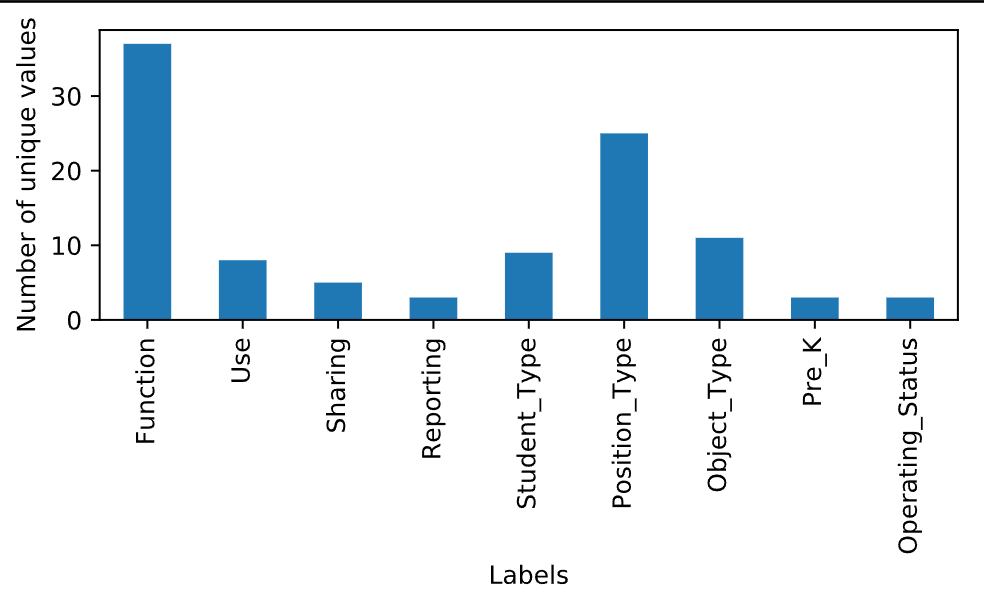

>  That's a lot of labels to work with. How will you measure success with these many labels?

**How do we measure success?**

Choosing how to evaluate your machine learning model is one of the most important decisions an analyst makes. The decision balances the real-world use of the algorithm, the mathematical properties of the evaluation function, and the interpretability of the measure.

**"how accurate is your model?"**

Accuracy is a simple measure that tells us what percentage of rows we got right. However, sometimes **accuracy doesn't tell the whole story**. 

>  Consider the case of identifying spam emails. Let's say that only 1% of the emails I receive are spam. The other 99% are legitimate emails. I can build a classifier that is 99% accurate just by assuming every message is legitimate, and never marking any message as spam. But this model isn't useful at all because every message, even the spam, ends up in my inbox. 

*The metric we use for this problem is called log loss.*

Log loss is what is generally called a "loss function," and **it is a measure of error**. We want our error to be as small as possible, which is the opposite of a metric like accuracy, where we want to maximize the value.

**Log loss binary classification**

Let's look at how logloss is calculated.
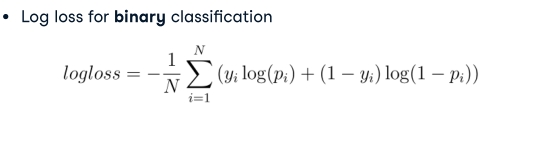

 It takes the actual value, 1 or 0, and it takes our prediction, which is a probability between 0 and 1.

 > The greek letter sigma (which looks like an uppercase E below) indicates that we're taking the sum of the logloss measures for each row of the dataset.

 We then multiply this sum by -1 over N, the number of rows, to get a single value for loss. 

 Let's see this on example
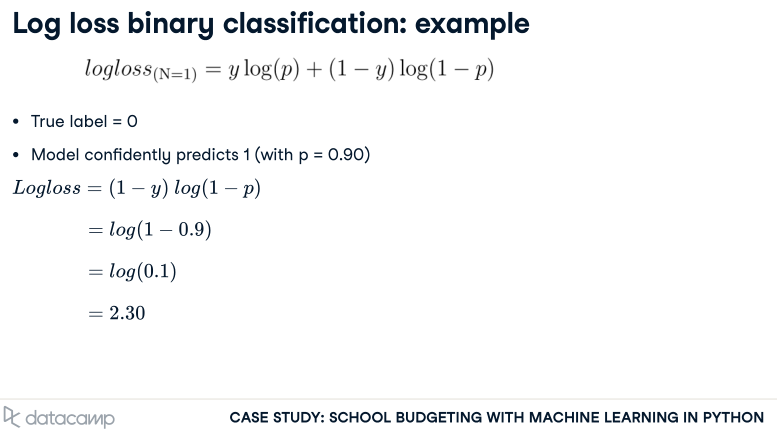

 Consider the case where the true label is 0, but we predict confidently that the label is 1. In this case, because y is 0, the first term becomes 0. This means the logloss is calculated by (1 - y) times log(1 - p). This simplifies to log(1 - 0-point-9) or log(0-point-1), which is 2-point-3. 

Now, consider the case that the correct label is 1, but our model is not sure and our prediction is right in the middle (0-point-5). Our logloss is 0-point-69. 

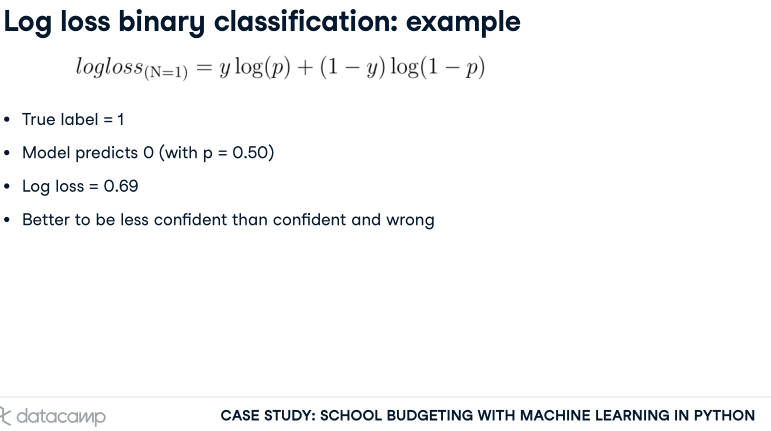

Since We are trying to minimize log loss, we can see that it is better to be less confident than it is to be confident and wrong.

**Computing log loss with NumPy**

Here is an implementation of logloss.

In [ ]:
import numpy as np
def compute_log_loss(predicted, actual, eps=1e-14):
  """ Computes the logarithmic loss between predicted and
  actual when these are 1D arrays.

  :param predicted: The predicted probabilities as floats between 0-1
  :param actual: The actual binary labels. Either 0 or 1.
  :param eps (optional): log(0) is inf, so we need to offset our
                        predicted values slightly by eps from 0 or 1.
  """
  predicted = np.clip(predicted, eps, 1 - eps)
  loss = -1 * np.mean(actual * np.log(predicted) + (1 - actual) * np.log(1 - predicted))
  return loss

The most important detail is the clip function which sets a maximum and minimum value for the elements in an array. 

Since log(0) is negative infinity, we want to offset our predictions ever so slightly from being exactly 1 or exactly 0 so that our score remains a real number. 

In this example we use the eps variable to be 0-point-00 (thirteen zeros) 1, which is close enough to zero to not effect our overall scores. After adjusting the predictions slightly with clip, we calculate logloss using the formula.

> If we call this function on the examples we looked at earlier, we can see that the confident and wrong item returns the expected value of 2-point-3 and the prediction that is right in the middle returns 0-point-69. 

In [ ]:
compute_log_loss(predicted=0.9, actual=0)

2.302585092994046

In [ ]:
compute_log_loss(predicted=0.5, actual=1)

0.6931471805599453

**Computing log loss with NumPy**

To see how the log loss metric handles the trade-off between accuracy and confidence, we will use some sample data generated with NumPy and compute the log loss using the provided function compute_log_loss().

5 one-dimensional numeric arrays simulating different types of predictions have been pre-loaded: actual_labels, correct_confident, correct_not_confident, wrong_not_confident, and wrong_confident.

Your job is to compute the log loss for each sample set provided using the compute_log_loss(predicted_values, actual_values). It takes the predicted values as the first argument and the actual values as the second argument.



In [ ]:
# Compute and print log loss for 1st case
correct_confident_loss = compute_log_loss(correct_confident, actual_labels)
print("Log loss, correct and confident: {}".format(correct_confident_loss)) 

# Compute log loss for 2nd case
correct_not_confident_loss = compute_log_loss(correct_not_confident, actual_labels)
print("Log loss, correct and not confident: {}".format(correct_not_confident_loss)) 

# Compute and print log loss for 3rd case
wrong_not_confident_loss = compute_log_loss(wrong_not_confident, actual_labels)
print("Log loss, wrong and not confident: {}".format(wrong_not_confident_loss)) 

# Compute and print log loss for 4th case
wrong_confident_loss = compute_log_loss(wrong_confident, actual_labels)
print("Log loss, wrong and confident: {}".format(wrong_confident_loss)) 

# Compute and print log loss for actual labels
actual_labels_loss = compute_log_loss(actual_labels, actual_labels)
print("Log loss, actual labels: {}".format(actual_labels_loss)) 


In [ ]:
    Log loss, correct and confident: 0.05129329438755058
    Log loss, correct and not confident: 0.4307829160924542
    Log loss, wrong and not confident: 1.049822124498678
    Log loss, wrong and confident: 2.9957322735539904
    Log loss, actual labels: 9.99200722162646e-15

>  Log loss penalizes highly confident wrong answers much more than any other type. This will be a good metric to use on your models. 





##Creating a simple first model

We'll use numeric data only to train the model. Remember to split the data!

*  how to format the predictions. 
* introduction to natural language processing (NLP) in order to start working with the large amounts of text in the data.

When approaching a machine learning problem, and in particular looking at a dataset from a machine learning competition, it's always a good approach to start with a very simple model. 

*Creating a simple model first helps to give us a sense of how challenging a question actually is*. Before we dig deep into complex models where many more things can go wrong, we want to understand how much signal we can pull out using basic methods.

**We'll start with a model that just uses the numeric data columns.**

In building our first model, we want to go from raw data to predictions as quickly as possible. In this case, **we'll use multi-class logistic regression**, which treats each label column as independent. 

**The model will train a logistic regression classifier for each of these columns separately and then use those models to predict whether the label appears or not for any given rows.**

After writing out our predictions to a CSV, we'll simulate submitting them to the competition and seeing what our score would be.

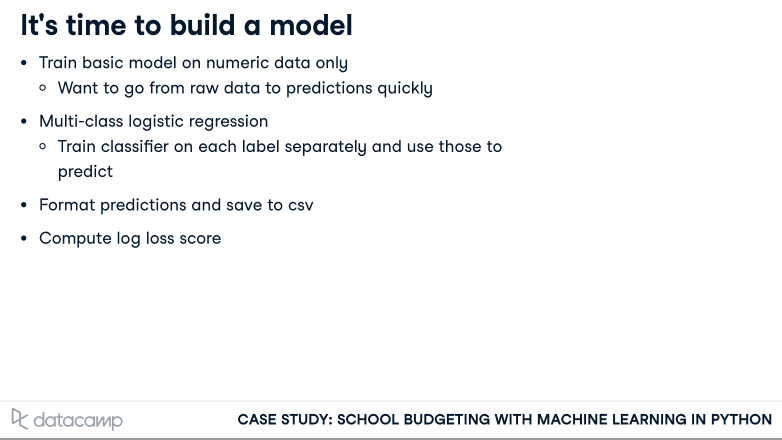



**Splitting the multi-class dataset**

*Because of the nature of our data, the simple approach to a train-test split won't work.*

 > Some labels that only appear in a small fraction of the dataset. If we split our dataset randomly, we may end up with labels in our test set that never appeared in our training set. Our model won't be able to predict a class that it has never seen before!

 One approach to this problem is called **StratifiedShuffleSplit**. However, this scikit-learn function **only works if you have a single target variable**. *In our case, we have many target variables*.

 To work around this issue, we've provided a utility function, multilabel_train_test_split, that will ensure that all of the classes are represented in both the test and training sets. 

 First, we'll subset our data to just the numeric columns. NUMERIC_COLUMNS is a variable we provide that contains a list of the column names for the columns that are numbers rather than text.

 Then we'll do a minimal amount of preprocessing where we fill the NaNs that are in the dataset with -1000. 

> In this case, we choose -1000, because we want our algorithm to respond to NaN's differently than 0.   

In [ ]:
data_to_train = df[NUMERIC_COLUMNS].fillna(-1000)

We'll create our array of target variables using the get_dummies function in pandas. Again, the get_dummies function takes our categories, and produces a binary indicator for our targets, which is the format that scikit-learn needs to build a model.

In [ ]:
labels_to_use = pd.get_dummies(df[LABELS])

Finally, we use the multilabel_train_test_split function that is provided to split the dataset in to a training set and a test set.

In [ ]:
X_train, X_test, y_train, y_test = multilabel_train_test_split(data_to_train, labels_to_use, size=0.2, seed=123)

**Training the model**

Now we can import our standard LogisticRegression classifier from sklearn dot linear_model. We'll also import the OneVsRestClassifier from the sklearn dot multiclass module. 

> OneVsRest let's us treat each column of y independently.

Essentially, it fits a separate classifier for each of the columns. This is just one strategy you can use if you have multiple classes. 

Now we can train that classifier by calling fit and passing our features in X_train and the corresponding labels that are in y_train.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)

**Setting up a train-test split in scikit-learn**

The first step is to split the data into a training set and a test set. Some labels don't occur very often, but we want to make sure that they appear in both the training and the test sets. We provide a function that will make sure at least min_count examples of each label appear in each split: multilabel_train_test_split.

 ```multilabel_train_test_split```: 

 ```
 def multilabel_train_test_split(X, Y, size, min_count=5, seed=None):
    """ Takes a features matrix `X` and a label matrix `Y` and
        returns (X_train, X_test, Y_train, Y_test) where all
        classes in Y are represented at least `min_count` times.
    """
    index = Y.index if isinstance(Y, pd.DataFrame) else np.arange(Y.shape[0])

    test_set_idxs = multilabel_sample(Y, size=size, min_count=min_count, seed=seed)
    train_set_idxs = np.setdiff1d(index, test_set_idxs)

    test_set_mask = index.isin(test_set_idxs)
    train_set_mask = ~test_set_mask

    return (X[train_set_mask], X[test_set_mask], Y[train_set_mask], Y[test_set_mask])
```

You'll start with a simple model that uses just the numeric columns of your DataFrame when calling multilabel_train_test_split. The data has been read into a DataFrame df and a list consisting of just the numeric columns is available as NUMERIC_COLUMNS.

In [ ]:
# Create the new DataFrame: numeric_data_only
numeric_data_only = df[NUMERIC_COLUMNS].fillna(-1000)

# Get labels and convert to dummy variables: label_dummies
label_dummies = pd.get_dummies(df[LABELS])

# Create training and test sets
X_train, X_test, y_train, y_test = multilabel_train_test_split(numeric_data_only,label_dummies, size=0.2, seed=123)

# Print the info
print("X_train info:")
print(X_train.info())
print("\nX_test info:")  
print(X_test.info())
print("\ny_train info:")  
print(y_train.info())
print("\ny_test info:")  
print(y_test.info()) 

In [ ]:
<script.py> output:
    X_train info:
    <class 'pandas.core.frame.DataFrame'>
    Int64Index: 1040 entries, 198 to 101861
    Data columns (total 2 columns):
    FTE      1040 non-null float64
    Total    1040 non-null float64
    dtypes: float64(2)
    memory usage: 24.4 KB
    None
    
    X_test info:
    <class 'pandas.core.frame.DataFrame'>
    Int64Index: 520 entries, 209 to 448628
    Data columns (total 2 columns):
    FTE      520 non-null float64
    Total    520 non-null float64
    dtypes: float64(2)
    memory usage: 12.2 KB
    None
    
    y_train info:
    <class 'pandas.core.frame.DataFrame'>
    Int64Index: 1040 entries, 198 to 101861
    Columns: 104 entries, Function_Aides Compensation to Operating_Status_PreK-12 Operating
    dtypes: uint8(104)
    memory usage: 113.8 KB
    None
    
    y_test info:
    <class 'pandas.core.frame.DataFrame'>
    Int64Index: 520 entries, 209 to 448628
    Columns: 104 entries, Function_Aides Compensation to Operating_Status_PreK-12 Operating
    dtypes: uint8(104)
    memory usage: 56.9 KB
    None

**Training a model**

In this exercise, you will import the logistic regression and one versus rest classifiers in order to fit a multi-class logistic regression model to the NUMERIC_COLUMNS of your feature data.

Then you'll test and print the accuracy with the ```.score()``` method to see the results of training.

Before you train! Remember, we're ultimately going to be using logloss to score our model, so don't worry too much about the accuracy here. Keep in mind that you're throwing away all of the text data in the dataset - that's by far most of the data! So don't get your hopes up for a killer performance just yet. We're just interested in getting things up and running at the moment.

In [ ]:
# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Create the DataFrame: numeric_data_only
numeric_data_only = df[NUMERIC_COLUMNS].fillna(-1000)

# Get labels and convert to dummy variables: label_dummies
label_dummies = pd.get_dummies(df[LABELS])

# Create training and test sets
X_train, X_test, y_train, y_test = multilabel_train_test_split(numeric_data_only,
                                                               label_dummies,
                                                               size=0.2, 
                                                               seed=123)

# Instantiate the classifier: clf
clf = OneVsRestClassifier(LogisticRegression())

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Print the accuracy
print("Accuracy: {}".format(clf.score(X_test, y_test)))

In [ ]:
<script.py> output:
    Accuracy: 0.0

> The good news is that your workflow didn't cause any errors. The bad news is that your model scored the lowest possible accuracy: 0.0! But hey, you just threw away ALL of the text data in the budget. Later, you won't. Before you add the text data, let's see how the model does when scored by log loss.

###Making predictions

Once our classifier is trained, we can use it to make predictions on new data. We could use our test set that we've withheld, but we want to simulate actually competing in a data science competition, so we will make predictions on the holdout set that the competition provides. 

As we did with our training data, we load the holdout data using the read_csv function from pandas. We then perform the same simple preprocessing we used earlier.

First, we select just the numeric columns. Then we use fillna to replace NaN values with -1000.Finally, we call the predict_proba method on our trained classifier. 

In [ ]:
holdout = pd.read_csv('HoldoutData.csv', index_col=0)
holdout = holdout[NUMERIC_COLUMNS].fillna(-1000)
predictions = clf.predict_proba(holdout)

Remember, we want to predict probabilities for each label, not just whether or not the label appears. If we simply used the predict method instead, we would end up with a 0 or 1 in every case. Because log loss penalizes you for being confident and wrong, the score for this submission would be significantly worse than if we use predict_proba.

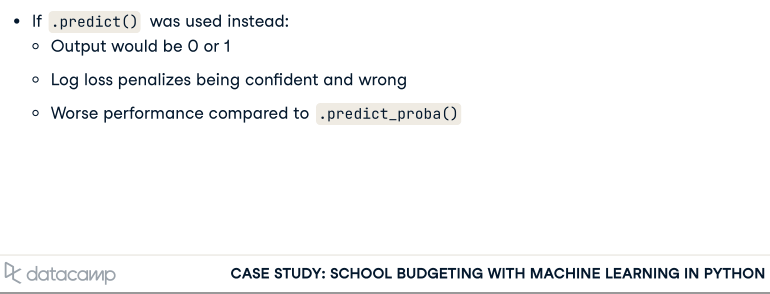

**Submitting your predictions as a csv**

*In data science competitions, it's a standard practice to write your predictions as a CSV and then upload that CSV to the competition platform.*

From the competition documentation, we can see that the submission format for this competition expects a dataframe that has each of the individual labels as the column headers and probabilities for each of the columns. The to_csv function on a DataFrame, will take our predictions and write them out to a file. 



In [ ]:
prediction_df = pd.DataFrame(columns=pd.get_dummies(df[LABELS], prefix_sep='__').columns, index=holdout.index, data=predictions)
prediction_df.to_csv('predictions.csv')
score = score_submission(pred_path='predictions.csv')

> you'll notice that our columns have the original column name separated from the value by two underscores. This is because some of the column names already contained single a underscore.

**Format and submit predictions**

The predictions that were generated by predict_proba is just an array of values. It doesn't have column names or an index like our submission format does. We'll fix this by turning those values into a DataFrame. 


To get the column names, we use get_dummies on our target variables and then borrow those column names for our new dataframe. Our index will be the same index that we read into pandas with read_csv, and the data is the predictions themselves. 


As we noted in the previous slide, we want to separate the original column names from the column values with a double underscore when we call get_dummies. To do this, we will use the keyword argument prefix_sep equals double underscore with the get_dummies function.

 Finally, we can call to_csv and pass the filename of the file we want to write out to disk. We can call the score_submission function that is provided to see how our submission would have scored in the competition!

 **Use your model to predict values on holdout data**

 You're ready to make some predictions! Remember, the train-test-split you've carried out so far is for model development. The original competition provides an additional test set, for which you'll never actually see the correct labels. This is called the "holdout data."

The point of the holdout data is to provide a fair test for machine learning competitions. If the labels aren't known by anyone but DataCamp, DrivenData, or whoever is hosting the competition, you can be sure that no one submits a mere copy of labels to artificially pump up the performance on their model.

Remember that the original goal is to predict the probability of each label. In this exercise you'll do just that by using the .predict_proba() method on your trained model.

First, however, you'll need to load the holdout data, which is available in the workspace as the file HoldoutData.csv.

In [ ]:
# Instantiate the classifier: clf
clf = OneVsRestClassifier(LogisticRegression())

# Fit it to the training data
clf.fit(X_train, y_train)

# Load the holdout data: holdout
holdout = pd.read_csv('HoldoutData.csv', index_col=0)

# Generate predictions: predictions
predictions = clf.predict_proba(holdout[NUMERIC_COLUMNS].fillna(-1000))

**Writing out your results to a csv for submission**

At last, you're ready to submit some predictions for scoring. In this exercise, you'll write your predictions to a .csv using the .to_csv() method on a pandas DataFrame. Then you'll evaluate your performance according to the LogLoss metric discussed earlier!

You'll need to make sure your submission obeys the correct format.

To do this, you'll use your predictions values to create a new DataFrame, prediction_df.

Interpreting LogLoss & Beating the Benchmark:

When interpreting your log loss score, keep in mind that the score will change based on the number of samples tested. To get a sense of how this very basic model performs, compare your score to the DrivenData benchmark model performance: 2.0455, which merely submitted uniform probabilities for each class.

Remember, the lower the log loss the better. Is your model's log loss lower than 2.0455?

In [ ]:
# Generate predictions: predictions
predictions = clf.predict_proba(holdout[NUMERIC_COLUMNS].fillna(-1000))

# Format predictions in DataFrame: prediction_df
prediction_df = pd.DataFrame(columns=pd.get_dummies(df[LABELS]).columns,
                             index=holdout.index,
                             data=predictions)


# Save prediction_df to csv
prediction_df.to_csv('predictions.csv')

# Submit the predictions for scoring: score
score = score_submission(pred_path='predictions.csv')

# Print score
print('Your model, trained with numeric data only, yields logloss score: {}'.format(score))

In [ ]:
Your model, trained with numeric data only, yields logloss score: 1.9067227623381413

> Even though your basic model scored 0.0 accuracy, it nevertheless performs better than the benchmark score of 2.0455. You've now got the basics down and have made a first pass at this complicated supervised learning problem. It's time to step up your game and incorporate the text data.

###A very brief introduction to NLP

Some of our data comes in the form or freefrom text. When we have **data that is text, we often want to process this text to create features for our algorithms**. This is called **Natural Language Processing**, or NLP. 

> Data for natural language processing can be text, as it is in our case, entire documents (for example, magazine articles or emails), or transcriptions of human speech.

1. The first step in processing this kind of data is called "tokenization". 

* Tokenization is the process of splitting a long string into segments. 
  * Usually, this means taking a string and splitting it into a list of strings where we have one string for each word. 
    * For example, we might split the string "Natural Language Processing" into a list of three separate tokens: "Natural," "Language," and "Processing".

Let's take a look at an example of actual data from our school budget dataset. We have the full string "PETRO-VEND FUEL AND FLUIDS."
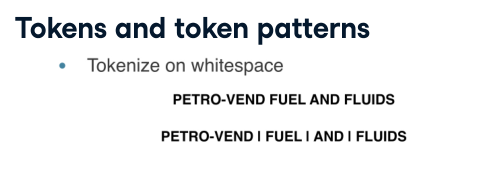




If we want to tokenize on whitespace, that is split into words every time there is a space, tab, or return in the text, we end up with 4 tokens. 
* The token "PETRO-VEND," 
* the token "FUEL,"
* the token "AND,"
* the token "FLUIDS."

 For some datasets, we may want to split words based on other characters than whitespace. For example, in this dataset we may observe that often we have words that are combined with a hyphen, like"PETRO-VEND." We can opt in this case to tokenize on whitespace and punctuation. Here we break into tokens every time we see a space or any mark of punctuation.

 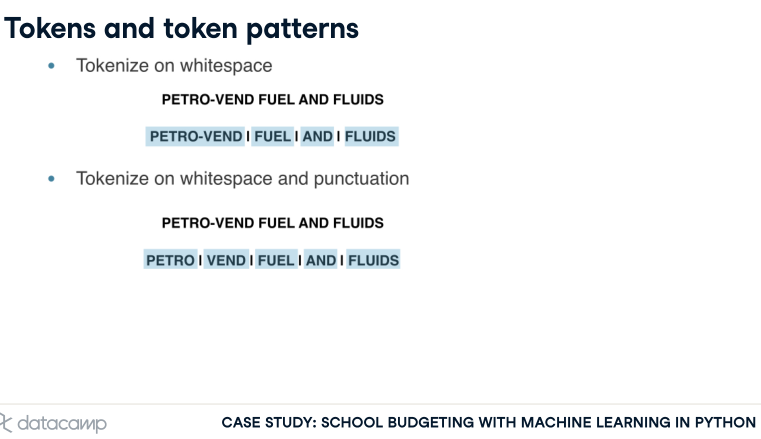

**Bag of words representation**

Now that we have our 5 tokens, we want to use them as part of our machine learning algorithm. Often, the first way to do this is to simply count the number of times that a particular token appears in a row.
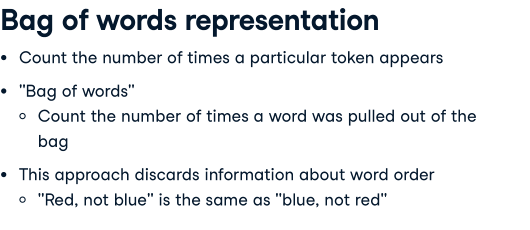


This is called a "bag of words" representation, because you can imagine our vocabulary as a bag of all of our words, and we just count the number of times a particular word was pulled out of that bag. 

If you're following along closely, you may have noticed that **this approach discards information about word order**. That is, the phrase "red, not blue" would be treated the same as "blue, not red." 

A slightly more sophisticated approach is to create what are called **"n-grams."**

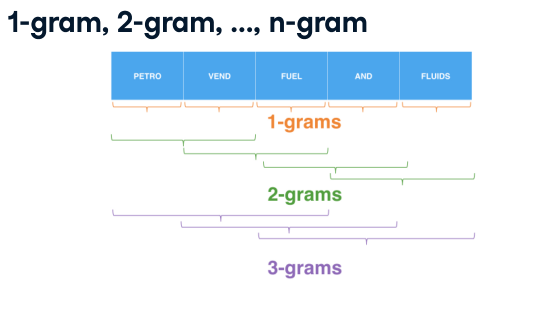

In addition to a column for every token we see, which is called a "1-gram," we may have a column for every ordered pair of two words. In that case, we'd have a column for "PETRO-VEND," a column for "VEND FUEL," a column for "FUEL AND," and a column for "AND FLUIDS." 

These are called 2-grams (or bi-grams). N can be any number, for example, we may also include 3-grams (or tri-grams) in this example. There are three columns for trigrams: one column for "PETRO-VEND FUEL," one for "VEND FUEL AND," and one for "FUEL AND FLUIDS."

###Representing text numerically

Let's talk about how we take the tokenizations we have created and turn them into an array that we can feed into a machine learning algorithm.

**bag-of-words**

This is one of the simplest ways to represent text in a machine learning algorithm. It discards information about grammar and word order, just assuming that the number of times a word occurs is enough information.

**Scikit-learn tools for bag-of-words**

Scikit-learn provides a very useful tool for creating bag-of-words representations. It is called the CountVectorizer. The CountVectorizer works by taking an array of strings and doing three things. 

* First, it tokenizes all of the strings. 
* Then, it makes note of all of the words that appear, which we call the "vocabulary". 
* Finally, it counts the number of times that each token in the vocabulary appears in every given row.

**Using CountVectorizer() on column of main dataset**

The CountVectorizer is part of the text submodule in the feature_extraction module in scikit-learn. After importing the CountVectorizer, we will define a regular expression that does a split on whitespace.

We'll also make sure that our text column does not have any NaN values, simply replacing those with empty strings instead. Finally, we'll create a CountVectorizer object where we pass in the token_pattern that we have created. This creates an object that we can use to create bag-of-words representations of text.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
TOKENS_BASIC = '\\\\S+(?=\\\\s+)'
df.Program_Description.fillna('', inplace=True)
vec_basic = CountVectorizer(token_pattern=TOKENS_BASIC)

The CountVectorizer object that we've created can be used with the fit and transform pattern, just like any other preprocessor in scikit-learn. fit will parse all of the strings for tokens and then create the vocabulary. Here, we use the word vocabulary specifically to mean all of the tokens that appear in this dataset. transform will tokenize the text and then produce the array of counts.

In [ ]:
vec_basic.fit(df.Program_Description)

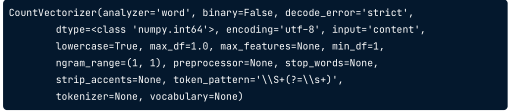

In [ ]:
msg = 'There are {} tokens in Program_Description if tokens are any non-whitespace'
print(msg.format(len(vec_basic.get_feature_names())))

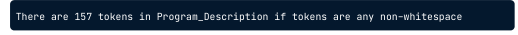

**Creating a bag-of-words in scikit-learn**

In this exercise, you'll study the effects of tokenizing in different ways by comparing the bag-of-words representations resulting from different token patterns.

You will focus on one feature only, the Position_Extra column, which describes any additional information not captured by the Position_Type label.

For example, in the Shell you can check out the budget item in row 8960 of the data using df.loc[8960]. Looking at the output reveals that this Object_Description is overtime pay. For who? The Position Type is merely "other", but the Position Extra elaborates: "BUS DRIVER". Explore the column further to see more instances. It has a lot of NaN values.



In [ ]:
df.loc[8960]

In [ ]:
Function                                         Student Transportation
Use                                                                 O&M
Sharing                                                 Shared Services
Reporting                                                    Non-School
Student_Type                                                Unspecified
Position_Type                                                     Other
Object_Type                                  Other Compensation/Stipend
Pre_K                                                          Non PreK
Operating_Status                                      PreK-12 Operating
Object_Description        Extra Duty Pay/Overtime For Support Personnel
Text_2                                                              NaN
SubFund_Description                                          Operations
Job_Title_Description                     TRANSPORTATION,BUS DR., RADIO
Text_3                                                              NaN
Text_4                                     transportation - Second Runs
Sub_Object_Description    Extra Duty Pay/Overtime For Support Personnel
Location_Description                                        Unallocated
FTE                                                                 NaN
Function_Description                                     Transportation
Facility_or_Department                        Transportation Department
Position_Extra                                               BUS DRIVER
Total                                                           1752.45
Program_Description                                       Undistributed
Fund_Description                                 General Operating Fund
Text_1                                                    EXTENDED DAYS
Name: 8960, dtype: object

Your task is to turn the raw text in this column into a bag-of-words representation by creating tokens that contain only alphanumeric characters.

For comparison purposes, the first 15 tokens of vec_basic, which splits df.Position_Extra into tokens when it encounters only whitespace characters, have been printed along with the length of the representation.



In [ ]:
df.Position_Extra

In [ ]:
198                                NaN
209                                NaN
750                            TEACHER
931                                NaN
1524                               NaN
1770                               NaN
1951                               NaN
2542        PROFESSIONAL-INSTRUCTIONAL
2640                               NaN
2939                      UNDESIGNATED
3029                      UNDESIGNATED
3395        PROFESSIONAL-INSTRUCTIONAL
4490                      UNDESIGNATED
4593        PROFESSIONAL-INSTRUCTIONAL
5050        PROFESSIONAL-INSTRUCTIONAL
5066                               NaN
5370                PROFESSIONAL-OTHER
5916                               NaN
6029               TIME CARD CERTIFIED
6054             ATHLETIC OPTIONAL PAY
6730                               NaN
6794                               NaN
7041                              AIDE
7151        PROFESSIONAL-INSTRUCTIONAL
8384                               NaN
8468                               NaN
8815                               NaN
8960                        BUS DRIVER
9722                               NaN
10876                   TEACHER MASTER
                      ...             
444647                TEACHER BACHELOR
444719                             NaN
444808              PROFESSIONAL-OTHER
445206                             NaN
445678                             NaN
445947                PARAPROFESSIONAL
445981                    UNDESIGNATED
446032                   ADMINISTRATOR
446102                             NaN
446199                    UNDESIGNATED
446528                   ADMINISTRATOR
446628                   ADMINISTRATOR
446668                             NaN
447383      PROFESSIONAL-INSTRUCTIONAL
447387                             NaN
447492                             NaN
447887                             NaN
448122     ANY CUS WHO IS NOT A SUPER 
448298                    UNDESIGNATED
448628                             NaN
448733                             NaN
448959    CONTRACTUAL SERVICES - OTHER
449761                             NaN
450067                    UNDESIGNATED
450277                             NaN
344986      PROFESSIONAL-INSTRUCTIONAL
384803      PROFESSIONAL-INSTRUCTIONAL
224382                             NaN
305347     ANY CUS WHO IS NOT A SUPER 
101861      PROFESSIONAL-INSTRUCTIONAL
Name: Position_Extra, Length: 1560, dtype: object

In [ ]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Fill missing values in df.Position_Extra
df.Position_Extra.fillna('', inplace=True)

# Instantiate the CountVectorizer: vec_alphanumeric
vec_alphanumeric = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Fit to the data
vec_alphanumeric.fit(df.Position_Extra)

# Print the number of tokens and first 15 tokens
msg = "There are {} tokens in Position_Extra if we split on non-alpha numeric"
print(msg.format(len(vec_alphanumeric.get_feature_names())))
print(vec_alphanumeric.get_feature_names()[:15])




In [ ]:
There are 123 tokens in Position_Extra if we split on non-alpha numeric
    ['1st', '2nd', '3rd', 'a', 'ab', 'additional', 'adm', 'administrative', 'and', 'any', 'art', 'assessment', 'assistant', 'asst', 'athletic']

>  Treating only alpha-numeric characters as tokens gives you a smaller number of more meaningful tokens. You've got bag-of-words in the bag!

**Combining text columns for tokenization**

In order to get a bag-of-words representation for all of the text data in our DataFrame, you must first convert the text data in each row of the DataFrame into a single string.

In the previous exercise, this wasn't necessary because you only looked at one column of data, so each row was already just a single string. CountVectorizer expects each row to just be a single string, so in order to use all of the text columns, you'll need a method to turn a list of strings into a single string.

In this exercise, you'll complete the function definition combine_text_columns(). When completed, this function will convert all training text data in your DataFrame to a single string per row that can be passed to the vectorizer object and made into a bag-of-words using the .fit_transform() method.

Note that the function uses NUMERIC_COLUMNS and LABELS to determine which columns to drop. These lists have been loaded into the workspace.

* Use the .drop() method on data_frame with to_drop and axis= as arguments to drop the non-text data. Save the result as text_data.

* Fill in missing values (inplace) in text_data with blanks (""), using the .fillna() method.
* Complete the .apply() method by writing a lambda function that uses the .join() method to join all the items in a row with a space in between.





In [ ]:
# Define combine_text_columns()
def combine_text_columns(data_frame, to_drop=NUMERIC_COLUMNS + LABELS):
    """ converts all text in each row of data_frame to single vector """
    
    # Drop non-text columns that are in the df
    to_drop = set(to_drop) & set(data_frame.columns.tolist())
    text_data = data_frame.drop(to_drop, axis=1)
    
    # Replace nans with blanks
    text_data.fillna('', inplace=True)
    
    # Join all text items in a row that have a space in between
    return text_data.apply(lambda x: " ".join(x), axis=1)

**What's in a token?**

Now you will use combine_text_columns to convert all training text data in your DataFrame to a single vector that can be passed to the vectorizer object and made into a bag-of-words using the .fit_transform() method.

You'll compare the effect of tokenizing using any non-whitespace characters as a token and using only alphanumeric characters as a token.

In [ ]:
# Import the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create the basic token pattern
TOKENS_BASIC = '\\S+(?=\\s+)'

# Create the alphanumeric token pattern
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Instantiate basic CountVectorizer: vec_basic
vec_basic = CountVectorizer(token_pattern=TOKENS_BASIC)

# Instantiate alphanumeric CountVectorizer: vec_alphanumeric
vec_alphanumeric = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Create the text vector
text_vector = combine_text_columns(df)

# Fit and transform vec_basic
vec_basic.fit_transform(text_vector)

# Print number of tokens of vec_basic
print("There are {} tokens in the dataset".format(len(vec_basic.get_feature_names())))

# Fit and transform vec_alphanumeric
vec_alphanumeric.fit_transform(text_vector)

# Print number of tokens of vec_alphanumeric
print("There are {} alpha-numeric tokens in the dataset".format(len(vec_alphanumeric.get_feature_names())))

In [ ]:
    There are 1404 tokens in the dataset
    There are 1117 alpha-numeric tokens in the dataset

> Notice that tokenizing on alpha-numeric tokens reduced the number of tokens, just as in the last exercise. We'll keep this in mind when building a better model with the Pipeline object next.

##Improving model performance

*How to improve on benchmark model using pipelines?*

 Because the budget consists of both text and numeric data, we'll be building pipielines that process multiple types of data. 
 
 * how the flexibility of the pipeline workflow makes testing different approaches efficient, even in complicated problems like this one!


###Pipelines, feature & text preprocessing

You've submitted your first simple model. Now it's time to combine what we've learned about NLP with our model pipeline and incorporate the text data into our algorithm.

**The pipeline workflow**

The [supervised learning](https://app.datacamp.com/learn/courses/supervised-learning-with-scikit-learn) course introduced pipelines, which are a repeatable way to go from raw data to a trained machine learning model.

> The scikit-learn Pipeline object takes a sequential list of steps where the output of one step is the input to the next.

Each step is represented with a name for the step, that is simply a string, and an object that implements the fit and the transform methods

*A good example is the CountVectorizer that we used earlier.*

As we'll see Pipelines are a very flexible way to represent your workflow. In fact, you can even have a sub-pipeline as one of the steps! The beauty of the Pipeline is that it encapsulates every transformation from raw data to a trained model.

**Instantiate simple pipeline with one step**

After importing the relevant modules, we'll start with a one step pipeline.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

pl = Pipeline([('clf', OneVsRestClassifier(LogisticRegression()))])

Although we don't need a pipeline for a single step, this exercise will get us familiar with the syntax. Remember, we create a Pipeline by passing it a series of named steps. 

> In this case the name is the string 'clf', and the step is the one-vs-rest logistic regression classifier we created earlier.

**Train and test with sample numeric data**

The sample dataset we've been working with has numeric data in the numeric columns and the with missing column. We'll start by building a model to predict the label column with the numeric data.

In [ ]:
sample_df.head()

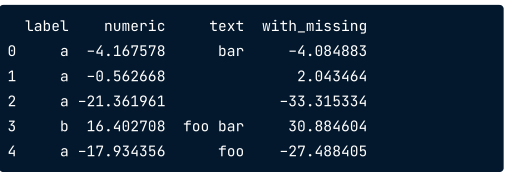

* First, we'll use the train_test split function from sklearn dot model_selection. 
> Our X will just be the numeric column, and our Y will be the dummy encoding of the label column. 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sample_df[['numeric']], pd.get_dummies(sample_df['label']), random_state=2)

* We'll call the fit method on our Pipeline, just like a normal classifier in sklearn.

In [ ]:
pl.fit(X_train, y_train

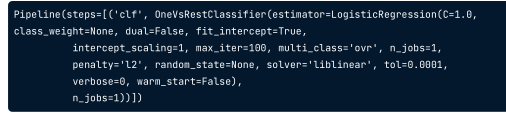

> We can see that it returns a Pipeline that has one step to do our logistic regression.

* By using the score function on our pipeline, we can see how our Pipeline performs on the test set. The default scoring method for this classifier is accuracy. That's good enough for our sample dataset.

In [ ]:
accuracy = pl.score(X_test, y_test)
print('accuracy on numeric data, no nans: ', accuracy)

In [ ]:
accuracy on numeric data, no nans: 0.44

**Adding more steps to the pipeline**

Let's add the with_missing column to our training set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(sample_df[['numeric', 'with_missing']], pd.get_dummies(sample_df['label']), random_state=2)

pl.fit(X_train, y_train)

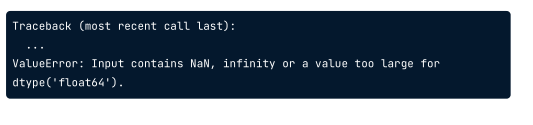

> Oops! Now when we call fit, we see a value error that explains that our input has NaN values.

**Preprocessing numeric features with missing data**

To address this, we'll add an Imputer to our pipeline, which will fill in the NaN values.
> To do so, we add a step to the Pipeline with the name 'imp' and an Imputer object. 

The default imputation in scikit-learn is to fill missing values with the mean of the column in question. You can look at the documentation of the Imputer object to see other possible imputation strategies.

In [ ]:
from sklearn.preprocessing import Imputer

X_train, X_test, y_train, y_test = train_test_split(sample_df[['numeric', 'with_missing']], pd.get_dummies(sample_df['label']), random_state=2)

pl = Pipeline([('imp', Imputer()),('clf', OneVsRestClassifier(LogisticRegression()))])

We can call fit and score on the new pipeline, just like we did before. But, in this case our model also includes the column with_missing which had NaN values that were imputed.

In [ ]:
pipeline.fit(X_train, y_train)
accuracy = pl.score(X_test, y_test)
print('accuracy on all numeric, incl nans: ', accuracy)

In [ ]:
accuracy on all numeric, incl nans: 0.48

Yey! No errors :)

**Instantiate pipeline**


In order to make your life easier as you start to work with all of the data in your original DataFrame, df, it's time to turn to one of scikit-learn's most useful objects: the Pipeline.

For the next few exercises, you'll reacquaint yourself with pipelines and train a classifier on some synthetic (sample) data of multiple datatypes before using the same techniques on the main dataset.

The sample data is stored in the DataFrame, sample_df, which has three kinds of feature data: numeric, text, and numeric with missing values. It also has a label column with two classes, a and b.

In this exercise, your job is to instantiate a pipeline that trains using the numeric column of the sample data.

In [ ]:
# Import Pipeline
from sklearn.pipeline import Pipeline

# Import other necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Split and select numeric data only, no nans 
X_train, X_test, y_train, y_test = train_test_split(sample_df[['numeric']],
                                                    pd.get_dummies(sample_df['label']), 
                                                    random_state=22)

# Instantiate Pipeline object: pl
pl = Pipeline([
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fit the pipeline to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - numeric, no nans: ", accuracy)

In [ ]:
Accuracy on sample data - numeric, no nans:  0.62

> Now it's time to incorporate numeric data with missing values by adding a preprocessing step!

**Preprocessing numeric features**

What would have happened if you had included the with 'with_missing' column in the last exercise? Without imputing missing values, the pipeline would not be happy (try it and see). So, in this exercise you'll improve your pipeline a bit by using the Imputer() imputation transformer from scikit-learn to fill in missing values in your sample data.

By default, the imputer transformer replaces NaNs with the mean value of the column. That's a good enough imputation strategy for the sample data, so you won't need to pass anything extra to the imputer.

After importing the transformer, you will edit the steps list used in the previous exercise by inserting a (name, transform) tuple. Recall that steps are processed sequentially, so make sure the new tuple encoding your preprocessing step is put in the right place.

The sample_df is in the workspace, in case you'd like to take another look. Make sure to select both numeric columns- in the previous exercise we couldn't use with_missing because we had no preprocessing step!

In [ ]:
# Import the Imputer object
from sklearn.preprocessing import Imputer

# Create training and test sets using only numeric data
X_train, X_test, y_train, y_test = train_test_split(sample_df[['numeric', 'with_missing']],
                                                    pd.get_dummies(sample_df['label']), 
                                                    random_state=456)

# Insantiate Pipeline object: pl
pl = Pipeline([('imp', Imputer()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fit the pipeline to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy =  pl.score(X_test, y_test)
print("\nAccuracy on sample data - all numeric, incl nans: ", accuracy)

In [ ]:
Accuracy on sample data - all numeric, incl nans:  0.636

> Now you know how to use preprocessing in pipelines with numeric data, and it looks like the accuracy has improved because of it! Text data preprocessing is next!

###Text features and feature unions

 we'll look at how we process text data in a pipeline and then how we put it all together.

 **Preprocessing text features**

 Our sample dataframe contains one column we haven't used yet, the text column. First, we'll change our train an test data just to be working with the text data for now.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
X_train, X_test, y_train, y_test = train_test_split(sample_df['text'], pd.get_dummies(sample_df['label']),random_state=2)

Then, we'll add a step to our Pipeline with the name vec and the CountVectorizer object from scikit-learn.

In [ ]:
pl = Pipeline([('vec', CountVectorizer()), ('clf', OneVsRestClassifier(LogisticRegression()))])

Now our pipeline will use the CountVectorizer on our dataset, and then it will pass the result into our classifier.



we can call the fit and score methods on the Pipeline. The score function now reports our accuracy if we just use the text data.

In [ ]:
pl.fit(X_train, y_train)

In [ ]:
Pipeline(steps=[('vec', CountVectorizer(analyzer='word', binary=False,
decode_error='strict', dtype=<class 'numpy.int64'>, encoding='utf-8',
input='content', lowercase=True, max_df=1.0, max_features=None, min_df=1,
ngram_range=(1, 1), preprocessor=None, stop_words=None, strip_...=None,
solver='liblinear', tol=0.0001, verbose=0, warm_start=False), n_jobs=1))])

In [ ]:
accuracy = pl.score(X_test, y_test)
print('accuracy on sample data: ', accuracy)

In [ ]:
accuracy on sample data: 0.64

**Preprocessing multiple dtypes**

*Let's say we want to use all of our data in a single pipeline.*

**We can't just have a Pipeline that has a CountVectorizer step, Imputation step, and then a classifier.**

The CountVectorizer won't know what to do with the numeric columns, and we don't want to perform imputation on the text columns. 

 In order to build our pipeline, we need to separately operate on the text columns and on the numeric columns. There are two tools: FunctionTransformer and FeatureUnion that will help us build a Pipeline to work with both our text and numeric data. The first utility that we cover is the FunctionTransformer.

 **FunctionTransformer**

 FunctionTransformer has a simple job: take a Python function, and turn it into an object that the scikit-learn Pipeline can understand.

 We'll write two simple functions: 
 * one that takes the whole dataframe, and returns just the numeric columns. 
 * The other will take the whole dataframe and return just the text columns. 
 
 Using these function transformers, we can build a separate Pipeline for our numeric data and for our text data.

 First, we'll do our train_test split on the entire dataset and import the FunctionTransformer and FeatureUnion utilities.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(sample_df[['numeric', 'with_missing', 'text']], pd.get_dummies(sample_df['label']), random_state=2)

from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion

Next, we'll create two FunctionTransformer objects. 

* The first takes a dataframe and just returns the column named 'text'. 
* The second takes a dataframe and returns the columns named 'numeric' and 'with_missing'. 

> These two function transformer objects will let us set up separate Pipelines that operate on the selected columns only. 

Note that we've passed the parameter validate equals False. This simply tells scikit-learn it doesn't need to check for NaNs or validate the dtypes of the input. We'll do that work ourselves.

In [ ]:
get_text_data = FunctionTransformer(lambda x: x['text'], validate=False)
get_numeric_data = FunctionTransformer(lambda x: x[['numeric', 'with_missing']], validate=False)

**FeatureUnion Text and Numeric Features**

FeatureUnion from the sklearn dot pipeline module is the other utility we need. We know that our text pipeline generates the array on the left, our text features.

And our numeric pipeline generates the array on the right, our numeric features.

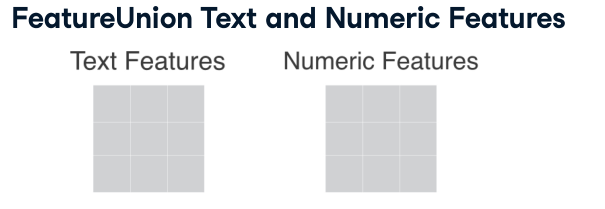

The FeatureUnion object puts these two sets of features together as a single array that will be the input to our classifier.

Here's our entire pipeline, which processes our text and numeric data. First, we create our separate text and numeric pipelines. 

> Remember, get_numeric_data and get_text_data are the FunctionTransformers that we just created. 

These pipelines output our numeric features and our text features respectively. The we create our overall pipeline, which has two steps: 

* First, the FeatureUnion takes a list of objects, calls each one, 
* and then concatenates the output into a wide array out of all of the results.

In [ ]:
from sklearn.pipeline import FeatureUnion
union = FeatureUnion([('numeric', numeric_pipeline),('text', text_pipeline)])

In [ ]:
numeric_pipeline = Pipeline([('selector', get_numeric_data),('imputer', Imputer())])
text_pipeline = Pipeline([('selector', get_text_data),('vectorizer', CountVectorizer())])

pl = Pipeline([('union', FeatureUnion([('numeric', numeric_pipeline),('text', text_pipeline)])),('clf', OneVsRestClassifier(LogisticRegression()))])

 In this case, it will call our numeric pipeline and then our text pipeline. Once we have this array of all of our features, we can pass it to our classifier. We can call fit and score on this pipeline, just like our simpler ones before it.

 **Preprocessing text features**

 Here, you'll perform a similar preprocessing pipeline step, only this time you'll use the text column from the sample data.

To preprocess the text, you'll turn to CountVectorizer() to generate a bag-of-words representation of the data, as in Chapter 2. Using the default arguments, add a (step, transform) tuple to the steps list in your pipeline.

Make sure you select only the text column for splitting your training and test sets.

As usual, your sample_df is ready and waiting in the workspace.

In [ ]:
# Import the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Split out only the text data
X_train, X_test, y_train, y_test = train_test_split(sample_df['text'],
                                                    pd.get_dummies(sample_df['label']), 
                                                    random_state=456)

# Instantiate Pipeline object: pl
pl = Pipeline([
        ('vec', CountVectorizer()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - just text data: ", accuracy)


In [ ]:
Accuracy on sample data - just text data:  0.808

**Multiple types of processing: FunctionTransformer**

The next two exercises will introduce new topics you'll need to make your pipeline truly excel.

Any step in the pipeline must be an object that implements the fit and transform methods. The FunctionTransformer creates an object with these methods out of any Python function that you pass to it. We'll use it to help select subsets of data in a way that plays nicely with pipelines.

You are working with numeric data that needs imputation, and text data that needs to be converted into a bag-of-words. You'll create functions that separate the text from the numeric variables and see how the .fit() and .transform() methods work.

In [ ]:
# Import FunctionTransformer
from sklearn.preprocessing import FunctionTransformer

# Obtain the text data: get_text_data
get_text_data = FunctionTransformer(lambda x: x['text'], validate=False)

# Obtain the numeric data: get_numeric_data
get_numeric_data = FunctionTransformer(lambda x: x[['numeric', 'with_missing']], validate=False)

# Fit and transform the text data: just_text_data
just_text_data = get_text_data.fit_transform(sample_df)

# Fit and transform the numeric data: just_numeric_data
just_numeric_data = get_numeric_data.fit_transform(sample_df)

# Print head to check results
print('Text Data')
print(just_text_data.head())
print('\nNumeric Data')
print(just_numeric_data.head())

In [ ]:
<script.py> output:
    Text Data
    0           
    1        foo
    2    foo bar
    3           
    4    foo bar
    Name: text, dtype: object
    
    Numeric Data
         numeric  with_missing
    0 -10.856306      4.433240
    1   9.973454      4.310229
    2   2.829785      2.469828
    3 -15.062947      2.852981
    4  -5.786003      1.826475

> You can see in the shell that fit and transform are now available to the selectors. Let's put the selectors to work!

**Multiple types of processing: FeatureUnion**

Now that you can separate text and numeric data in your pipeline, you're ready to perform separate steps on each by nesting pipelines and using FeatureUnion().

These tools will allow you to streamline all preprocessing steps for your model, even when multiple datatypes are involved. Here, for example, you don't want to impute our text data, and you don't want to create a bag-of-words with our numeric data. Instead, you want to deal with these separately and then join the results together using FeatureUnion().

In the end, you'll still have only two high-level steps in your pipeline: preprocessing and model instantiation. The difference is that the first preprocessing step actually consists of a pipeline for numeric data and a pipeline for text data. The results of those pipelines are joined using FeatureUnion().



In [ ]:
# Import FeatureUnion
from sklearn.pipeline import FeatureUnion

# Split using ALL data in sample_df
X_train, X_test, y_train, y_test = train_test_split(sample_df[['numeric', 'with_missing', 'text']],
                                                    pd.get_dummies(sample_df['label']), 
                                                    random_state=22)

# Create a FeatureUnion with nested pipeline: process_and_join_features
process_and_join_features = FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )

# Instantiate nested pipeline: pl
pl = Pipeline([
        ('union', process_and_join_features),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])


# Fit pl to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - all data: ", accuracy)


In [ ]:
Accuracy on sample data - all data:  0.928

###Choosing a classification model

Now that we understand how to pull together text and numeric data into a single machine learning pipeline, we'll return to talking about our school budget dataset. In the sample dataset, there was only one text column. This is the format that CountVectorizer expects.

However, our main dataset has 14 text columns. In an interactive exercise during our NLP chapter we wrote a function combine_text_columns that put together all of the text columns into a single column. We'll re-use this function as part of our Pipeline to process the text in the budget dataset.

**Using pipeline with the main dataset**

Again, as we did in the last chapter, we'll use the get_dummies function from pandas to create our label array, and we'll also create our train-test split using the multilabel_train_test_split function. 

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('TrainingSetSample.csv', index_col=0)
dummy_labels = pd.get_dummies(df[LABELS])

X_train, X_test, y_train, y_test = multilabel_train_test_split(df[NON_LABELS], dummy_labels,0.2)

Now we'll create a pipeline for working with our main dataset. 

The beauty of this code, is that it has one change from the code we used for the sample dataset: we create a FunctionTransformer object using our combine_text_columns function instead of the simple selection function we used in the sample dataset. 

In [ ]:
get_text_data = FunctionTransformer(combine_text_columns, validate=False)
get_numeric_data = FunctionTransformer(lambda x: x[NUMERIC_COLUMNS], validate=False)

Other than this one change, the pipeline that processes the text, imputes the numeric columns, joins those results together and then fits a multilabel logistic regression remains the same.

In [ ]:
pl = Pipeline([('union', FeatureUnion([('numeric_features', Pipeline([('selector', get_numeric_data),('imputer', Imputer())])),('text_features', Pipeline([('selector', get_text_data),('vectorizer', CountVectorizer())]))])),('clf', OneVsRestClassifier(LogisticRegression()))])

**Performance**

We can now fit this Pipeline on the school budget dataset. As part of our exercises, we'll look at the results of this pipeline.  

In [ ]:
pl.fit(X_train, y_train)

In [ ]:
Pipeline(steps=[('union', FeatureUnion(n_jobs=1,
transformer_list=[('numeric_features', Pipeline(steps=
[('selector', FunctionTransformer(accept_sparse=False,
func=<function <lambda> at 0x11415ec80>, pass_y=False,
validate=False)), ('imputer', Imputer(axis=0, copy=True,
missing_valu...=None, solver='liblinear', tol=0.0001,
verbose=0, warm_start=False),n_jobs=1))])

Now we have infrastructure for processing our features and fitting a model.

This infrastructure allows us to easily experiment with adapting different parts of the pipeline. Part of your challenge in the exercises will be to improve the performance of the pipeline.

**Flexibility of model step**

*For example, we can easily experiment with different classes of models.*

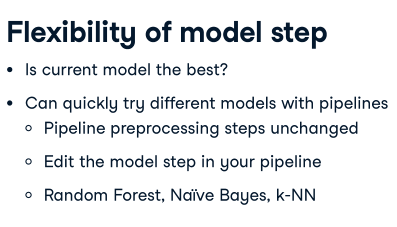

All of our Pipeline code can stay the same, but we can update the last step to be a different class of model instead of LogisticRegression. For example, we could try a RandomForestClassifier, NaiveBayesClassifier, or a KNeighborsClassifier instead. 

> In fact, you can look at the scikit-learn documentation and choose any model class you want!

**Easily try new models using pipeline**

Here's an example of how simple it is to change the classification method in our scikit-learn Pipeline. 

We simply import a different class of model--in this case, we'll use a RandomForestClassifier. Then, the only other line that needs to change is the one that defines the classifier inside the Pipeline. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
pl = Pipeline([('union', FeatureUnion(transformer_list = [('numeric_features', Pipeline([('selector', get_numeric_data), ('imputer', Imputer())])), ('text_features', Pipeline([('selector', get_text_data), ('vectorizer', CountVectorizer())]))])), ('clf', OneVsRest(RandomForestClassifier()))])

This makes it very simple for us to try a large number of different model classes and determine which one is the best for the problem that we're working on.

**Using FunctionTransformer on the main dataset**

In this exercise you're going to use FunctionTransformer on the primary budget data, before instantiating a multiple-datatype pipeline in the next exercise.

Recall from Chapter 2 that you used a custom function combine_text_columns to select and properly format text data for tokenization; it is loaded into the workspace and ready to be put to work in a function transformer!

Concerning the numeric data, you can use NUMERIC_COLUMNS, preloaded as usual, to help design a subset-selecting lambda function.

You're all finished with sample data. The original df is back in the workspace, ready to use.

In [ ]:
# Import FunctionTransformer
from sklearn.preprocessing import FunctionTransformer

# Get the dummy encoding of the labels
dummy_labels = pd.get_dummies(df[LABELS])

# Get the columns that are features in the original df
NON_LABELS = [c for c in df.columns if c not in LABELS]

# Split into training and test sets
X_train, X_test, y_train, y_test = multilabel_train_test_split(df[NON_LABELS],
                                                               dummy_labels,
                                                               0.2, 
                                                               seed=123)

# Preprocess the text data: get_text_data
get_text_data = FunctionTransformer(combine_text_columns, validate=False)

# Preprocess the numeric data: get_numeric_data
get_numeric_data = FunctionTransformer(lambda x: x[NUMERIC_COLUMNS], validate=False)


**Add a model to the pipeline**

You're about to take everything you've learned so far and implement it in a Pipeline that works with the real, DrivenData budget line item data you've been exploring.

Surprise! The structure of the pipeline is exactly the same as earlier in this chapter:

the preprocessing step uses FeatureUnion to join the results of nested pipelines that each rely on FunctionTransformer to select multiple datatypes
the model step stores the model object
You can then call familiar methods like .fit() and .score() on the Pipeline object pl.

In [ ]:
# Complete the pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)

> Now that you've built the entire pipeline, you can easily start trying out different models by just modifying the 'clf' step.

**Try a different class of model**

Now you're cruising. One of the great strengths of pipelines is how easy they make the process of testing different models.

Until now, you've been using the model step ('clf', OneVsRestClassifier(LogisticRegression())) in your pipeline.

But what if you want to try a different model? Do you need to build an entirely new pipeline? New nests? New FeatureUnions? Nope! You just have a simple one-line change, as you'll see in this exercise.

In particular, you'll swap out the logistic-regression model and replace it with a random forest classifier, which uses the statistics of an ensemble of decision trees to generate predictions.

In [ ]:
# Import random forest classifer
from sklearn.ensemble import RandomForestClassifier

# Edit model step in pipeline
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )),
        ('clf', RandomForestClassifier())
    ])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)

In [ ]:
Accuracy on budget dataset:  0.2826923076923077

An accuracy improvement- amazing! All your work building the pipeline is paying off. It's now very simple to test different models!

**Can you adjust the model or parameters to improve accuracy?**

You just saw a substantial improvement in accuracy by swapping out the model. Pipelines are amazing!

Can you make it better? Try changing the parameter n_estimators of RandomForestClassifier(), whose default value is 10, to 15.

In [ ]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Add model step to pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )),
        ('clf', RandomForestClassifier(n_estimators=15))
    ])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)

In [ ]:
Accuracy on budget dataset:  0.3211538461538462

> It's time to get serious and work with the log loss metric.



##Tips for winning the competitions

###Learning from the expert: processing

> Some of the tricks are about **text processing**, some are about **statistical methods**, and some are about **computational efficiency**.

 While some of this may be new, some of it may be familiar from this course or other work you've done on DataCamp. By knowing which tools to combine, we can build extremely effective models.

 **Learning from the expert: text preprocessing**

 In our introduction to natural language processing, we introduced the same tools that the winner used. These are common tools for manipulating text, and are often effective for improving models based on text data.

 > The first trick the winner used was to tokenize on punctuation. By noticing that there are lots of characters like hyphens, periods, and underscores in the text we are working with, the winner picked out a better way of separating words than just spaces.

 **The other trick was to use a range of n-grams in the model.**
 > By including unigrams and bigrams, the winner was more likely to capture important information that appears as multiple tokens in the text--for example, "middle school".

 **N-grams and tokenization**

 One of the massive benefits of building our models on top of scikit-learn is that many of these common tools are implemented for us and are well-tested by a large community. To change our tokenization and add bi-grams, we can change our call to CountVectorizer. 

In [ ]:
#Ngram

vec = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
ngram_range=(1, 2))

* We'll pass the regular expression to only accept alpha-numeric characters in our tokens. We defined this expression back in chapter 2.
* We'll also add the parameter ngram_range equals (1, 2). This tells the CountVectorizer to include 1-grams and 2-grams in the vectorization. 

These changes to the call to CountVectorizer are the only changes we need to make in order to add these preprocessing steps. We can easily update our pipeline to include this change, which will be part of the exercises.

**Range of n-grams in scikit-learn**

Then we fit our updated pipeline in the same way that we've been doing throughout the course: simply call the fit method on our Pipeline object. Getting predictions from our model is also the same as it has been throughout.

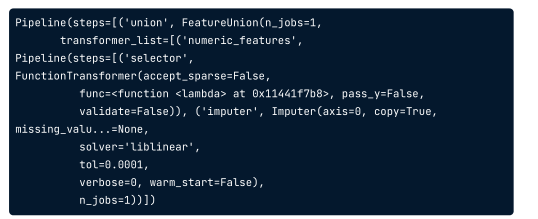

We use the predict_proba function to get our class probabilities. Because we have built our preprocessing into our Pipeline, we don't need to do any additional processing on our holdout data when we load it. The pipeline represents the entire prediction process from raw data to class probabilities.

In [ ]:
holdout = pd.read_csv('HoldoutData.csv', index_col=0)
predictions = pl.predict_proba(holdout)
prediction_df = pd.DataFrame(columns=pd.get_dummies(
df[LABELS]).columns, index=holdout.index,
data=predictions)
prediction_df.to_csv('predictions.csv')
score = score_submission(pred_path='predictions.csv')

**Deciding what's a word**

Before you build up to the winning pipeline, it will be useful to look a little deeper into how the text features will be processed.

In this exercise, you will use CountVectorizer on the training data X_train (preloaded into the workspace) to see the effect of tokenization on punctuation.

Remember, since CountVectorizer expects a vector, you'll need to use the preloaded function, combine_text_columns before fitting to the training data.


In [ ]:
# Import the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create the text vector
text_vector = combine_text_columns(X_train)

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Instantiate the CountVectorizer: text_features
text_features = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Fit text_features to the text vector
text_features.fit(text_vector)

# Print the first 10 tokens
print(text_features.get_feature_names()[:10])

In [ ]:
['00a', '12', '1st', '2nd', '3rd', '5th', '70', '70h', '8', 'a']

**N-gram range in scikit-learn**

In this exercise you'll insert a CountVectorizer instance into your pipeline for the main dataset, and compute multiple n-gram features to be used in the model.

In order to look for ngram relationships at multiple scales, you will use the ngram_range parameter as Peter discussed in the video.

Special functions: You'll notice a couple of new steps provided in the pipeline in this and many of the remaining exercises. Specifically, the dim_red step following the vectorizer step , and the scale step preceeding the clf (classification) step.

These have been added in order to account for the fact that you're using a reduced-size sample of the full dataset in this course. To make sure the models perform as the expert competition winner intended, we have to apply a dimensionality reduction technique, which is what the dim_red step does, and we have to scale the features to lie between -1 and 1, which is what the scale step does.

The dim_red step uses a scikit-learn function called SelectKBest(), applying something called the chi-squared test to select the K "best" features. The scale step uses a scikit-learn function called MaxAbsScaler() in order to squash the relevant features into the interval -1 to 1.

You won't need to do anything extra with these functions here, just complete the vectorizing pipeline steps below. However, notice how easy it was to add more processing steps to our pipeline!



In [ ]:
# Import pipeline
from sklearn.pipeline import Pipeline

# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Import other preprocessing modules
from sklearn.preprocessing import Imputer
from sklearn.feature_selection import chi2, SelectKBest

# Select 300 best features
chi_k = 300

# Import functional utilities
from sklearn.preprocessing import FunctionTransformer, MaxAbsScaler
from sklearn.pipeline import FeatureUnion

# Perform preprocessing
get_text_data = FunctionTransformer(combine_text_columns, validate=False)
get_numeric_data = FunctionTransformer(lambda x: x[NUMERIC_COLUMNS], validate=False)

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Instantiate pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                   ngram_range=(1, 2))),
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

Log loss score: 1.2681. Great work! You'll now add some additional tricks to make the pipeline even better.

###Learning from the expert: a stats trick

Now that you have experience with the text processing tricks that won the competition, we'll introduce some additional tools that the winner used.

*The statistical tool that the winner used is called interaction terms.*

>  We use bigrams to account for when words appear in a certain order. 

**However, what if terms are not next to each other?**

For example, consider "English Teacher for 2nd Grade" and "2nd Grade - budget for English Teacher". 

 If I want to identify this line item as a staff position for an elementary school, it helps to know that both "2nd grade" and "English teacher" appear. Interaction terms let us mathematically describe when tokens appear together.

**Interaction terms: the math**

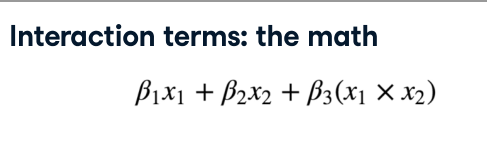

Beta-one times X1, beta 2 times X2.

* Here, X1 and X2 represent whether or not a particular token appears in the row. 
* The betas are the coefficients, which represent how important that particular token is. 
* To add an interaction term, we add another column to our array, X3 that equals X1 times X2.
>  Because X1 and X2 are either 0 or 1, when we multiply them, we only get a 1 if both occur. 

This new column, X3, has its own coefficient, Beta 3, which can separately measure how important it is that X1 and X2 appear together. 
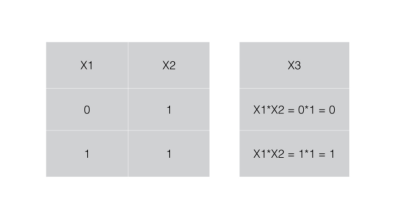
**Adding interaction features with scikit-learn**

scikit-learn provides us with a straightforward way of adding interaction terms.



In scikit-learn this functionality is called PolynomialFeatures and we import it from the sklearn dot preprocessing module. As an example, we'll show the same x matrix as the last slide. 



In [ ]:
from sklearn.preprocessing import PolynomialFeatures
x

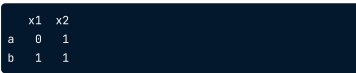

When we create a PolynomialFeatures we tell it the degree of features to include. In our example, we looked at multiplying 2 columns together to see if they co-occurred, so degree equals 2, however you could 3, 4, or more. 

While this can sometimes improve the model results, adding larger degrees very quickly scales the number of features outside of what is computationally feasible. The interaction_only equals True parameter tells PolynomialFeatures that we don't need to multiply a column by itself, and we'll talk about include_bias on the next slide. 

In [ ]:
interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

interaction.fit_transform(x)

In [ ]:
array([[ 0., 1., 0.],
[ 1., 1., 1.]])

When we fit and transform our array, x, we can see that we get the expected output from the last slide with the new column added. We opted not to include a bias term in our model, but you could have if you wanted to. A bias term is an offset for a model.

**A note about bias terms**

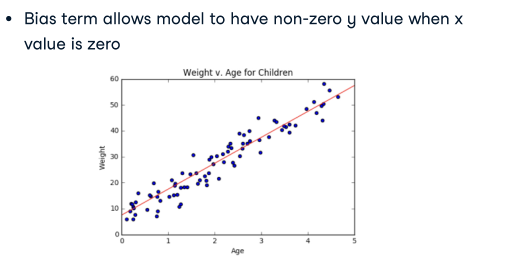

For example, if we plot age on the x-axis, and weights on the y-axis, we'd have a line that had a value 7-point-5 lbs when the baby is born, because a baby has a weight even when it is 0 years old! 

**A bias term allows your model to account for situations where an x value of 0 should have a y value that is not 0, like in this example.**

**Sparse interaction features**

As we mentioned, adding interaction terms makes your X array grow exponentially. 

Because of computational concerns, our CountVectorizer returns an object called a sparse matrix. 

We won't dig into the details here, but the standard PolynomialFeatures object is not compatible with a sparse matrix. We provide you with a replacement, SparseInteractions which works with a sparse matrix. You only need to pass it the degree parameter for it to work in the same way.



In [ ]:
SparseInteractions(degree=2).fit_transform(x).toarray()

In [ ]:
array([[ 0., 1., 0.],
[ 1., 1., 1.]])

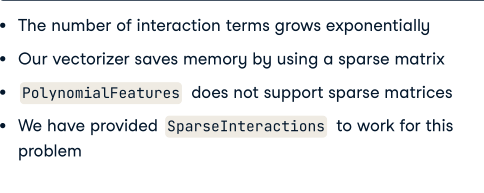

**Implement interaction modeling in scikit-learn**

It's time to add interaction features to your model. The PolynomialFeatures object in scikit-learn does just that, but here you're going to use a custom interaction object, SparseInteractions. Interaction terms are a statistical tool that lets your model express what happens if two features appear together in the same row.

SparseInteractions does the same thing as PolynomialFeatures, but it uses sparse matrices to do so. You can get the code for SparseInteractions at this GitHub Gist.

PolynomialFeatures and SparseInteractions both take the argument degree, which tells them what polynomial degree of interactions to compute.

You're going to consider interaction terms of degree=2 in your pipeline. You will insert these steps after the preprocessing steps you've built out so far, but before the classifier steps.

Pipelines with interaction terms take a while to train (since you're making n features into n-squared features!), so as long as you set it up right, we'll do the heavy lifting and tell you what your score is!

In [ ]:
# Instantiate pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                   ngram_range=(1, 2))),  
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('int', SparseInteractions(degree=2)),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

Log loss score: 1.2256. Nice improvement from 1.2681!

###Learning from the expert: the winning model

**Learning from the expert: hashing trick**

We've mentioned that we need to balance adding new features with the computational cost of additional columns.

>  For example, adding 3-grams or 4-grams is going to have an enormous increase in the size of the array. 

**As the array grows in size, we need more computational power to fit our model.**

The "hashing trick" is a way of limiting the size of the matrix that we create without sacrificing too much model accuracy. 

*A hash function takes an input, in this case a token, and outputs a hash value.*

 For example, the hash value may be an integer like in this example below.

 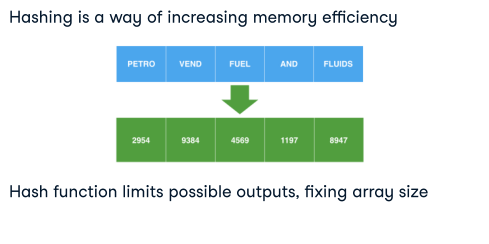

We explicitly state how many possible outputs the hashing function may have. For example, we may say that we will only have 250 outputs of the hash function. The HashingVectorizer then maps every token to one of those 250 columns. Some columns will have multiple tokens that map to them. 

Interestingly, the original paper about the hashing function demonstrates that even if two tokens hash to the same value, there is very little effect on model accuracy in real world problems.

**When to use the hashing trick**

We've been working with a small subset of the data for this course, however, the size of the full dataset is part of the challenge. In this situation, we want to do whatever we can to make our array of features smaller. Doing so is called "dimensionality reduction". **The hashing trick is particularly useful in cases like this where we have a very large amount of text data.**

**Implementing the hashing trick in scikit-learn**

Implementing the hashing trick is very simple in scikit-learn. Instead of using the CountVectorizer, which creates the bag of words representation, we change to the HashingVectorizer.

We can pass this the same token_pattern and ngram_range as before. The parameters norm equals None and non_negative equals True let you drop in the HashingVectorizer as a replacement for the CountVectorizer.
> For more details on those two parameters, you can see the scikit-learn documentation. 

We can now use the HashingVectorizer in a Pipeline instead of the CountVectorizer.

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer

vec = HashingVectorizer(norm=None, non_negative=True, token_pattern=TOKENS_ALPHANUMERIC, ngram_range=(1, 2))

**The model that won it all**

We've worked through the three categories of tools that the winner put together to win the competition. 
1. The NLP trick was to use bigrams and tokenize on punctuation. 
2. The statistical trick was to add interaction terms to the model. 
3. The computational trick was to use a HashingVectorizer.

You can now code all of these in a scikit-learn Pipeline. However, there's one thing we haven't talked about yet. What is the class of model that the winner used? Was it a deep convolutional neural network? Extreme gradient boosted trees? An ensemble of local-expert elastic net regressions?

**No! The winning model was, in fact, the simple model we started with: logistic regression!**

The competition wasn't won by a cutting edge algorithm. 

> Instead, it was won by thinking carefully about how to create features for the model and then adding a couple of easily implemented tricks. 

So, instead of reaching for those advanced algorithms that are hard to interpret and expensive to train, it's always worth it to see how far you can get with simpler methods.

**Implementing the hashing trick in scikit-learn**

In this exercise you will check out the scikit-learn implementation of HashingVectorizer before adding it to your pipeline later.

As you saw in the video, HashingVectorizer acts just like CountVectorizer in that it can accept token_pattern and ngram_range parameters. The important difference is that it creates hash values from the text, so that we get all the computational advantages of hashing!

In [ ]:
# Import HashingVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

# Get text data: text_data
text_data = combine_text_columns(X_train)

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)' 

# Instantiate the HashingVectorizer: hashing_vec
hashing_vec = HashingVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Fit and transform the Hashing Vectorizer
hashed_text = hashing_vec.fit_transform(text_data)

# Create DataFrame and print the head
hashed_df = pd.DataFrame(hashed_text.data)
print(hashed_df.head())

In [ ]:
<script.py> output:
              0
    0 -0.160128
    1  0.160128
    2 -0.480384
    3 -0.320256
    4  0.160128

> As you can see, some text is hashed to the same value, but as Peter mentioned in the video, this doesn't neccessarily hurt performance.

**Build the winning model**

You've constructed a robust, powerful pipeline capable of processing training and testing data. Now that you understand the data and know all of the tools you need, you can essentially solve the whole problem in a relatively small number of lines of code. Wow!

All you need to do is add the HashingVectorizer step to the pipeline to replace the CountVectorizer step.

The parameters non_negative=True, norm=None, and binary=False make the HashingVectorizer perform similarly to the default settings on the CountVectorizer so you can just replace one with the other.

In [ ]:
# Import the hashing vectorizer
from sklearn.feature_extraction.text import HashingVectorizer

# Instantiate the winning model pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', HashingVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                     non_negative=True, norm=None, binary=False,
                                                     ngram_range=(1, 2))),
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('int', SparseInteractions(degree=2)),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

> Log loss: 1.2258. Looks like the performance is about the same, but this is expected since the HashingVectorizer should work the same as the CountVectorizer. Try this pipeline out on the whole dataset on your local machine to see its full power!

**What tactics got the winner the best score?**

> The winner used skillful NLP, efficient computation, and simple but powerful stats tricks to master the budget data.

(Here)['https://github.com/datacamp/course-resources-ml-with-experts-budgets/blob/master/notebooks/1.0-full-model.ipynb'] you find all the code, we've been working on. 


DrivenData: Data Science to save the world

Other ways to use data science to have a social impact at
[www.drivendata.org](https://drivendata.org)
Improve your data science skills while helping meaningful
organizations thrive
Win some cash prizes while you're at it!